In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Add in the Yu sample to the prior in a sensible way

We want to expand our prior to include the Yu sample.  This is easy enough to do but is just a case of getting all out ducks in a row.

Let's start by looking at what we have so far ...

In [83]:
current_filename = 'prior_data.csv'
df_current = pd.read_csv(current_filename)
df_current.drop(columns='Unnamed: 0', inplace=True)
df_current.head()

,dnu,numax,eps,d02,alpha,env_height,env_width,mode_width,teff,bp_rp
0,0.797313,1.849061,1.042422,-0.083138,-2.013106,1.117461,0.949266,-0.951869,3.692062,1.319325
1,0.613473,1.621688,0.932101,-0.293549,-1.886150,0.891196,0.796977,-1.005161,3.677316,1.413556
2,0.559830,1.422844,0.831581,-0.242940,-1.465383,0.308770,0.689412,-0.851908,3.691585,1.330576
3,0.871902,1.971060,1.024286,-0.083248,-2.069506,0.749085,1.140958,-0.620151,3.703231,1.167095
4,0.574075,1.472324,0.759243,-0.220728,-2.064063,0.755530,0.589592,-1.139218,3.679067,1.404783


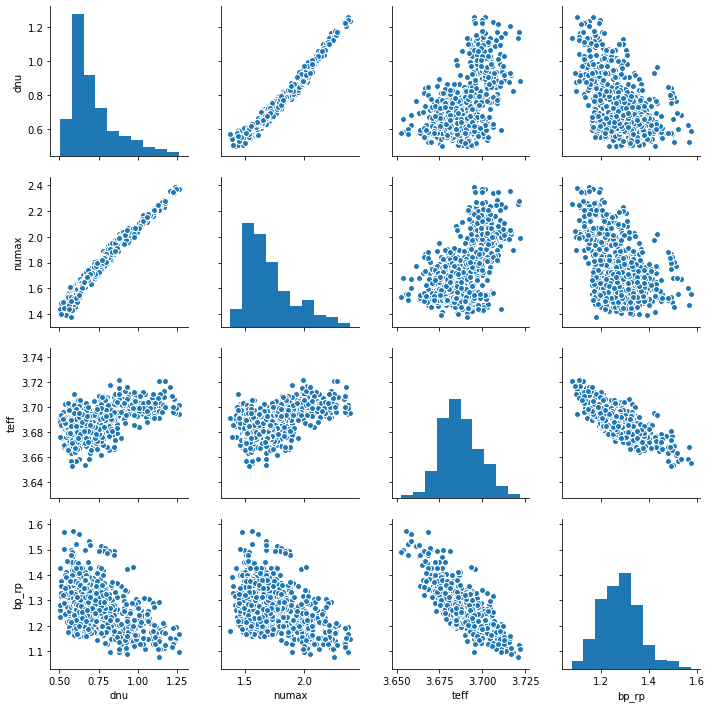

In [25]:
sns.pairplot(df_current[['dnu', 'numax', 'teff', 'bp_rp']])

## The Yu sample

The Yu sample is ~16K stars.  We want to add all of them in but it probably makes sense to add them in in batches.  If we start with a set of ~ 1000 stars from the Yu sample that look like they have properties similar to the prior and then repeat, slowly expandnig the reach of the prior untill all the Yu stars are processed.

The current prior sample is probably similar to the Yu sample except in that it will have a lack of low numax stars and a lack of metal poor stars (and potentially a lack of metal rich stars).  So we should pa paticular attention to numax and [Fe/H].

Except - we don't use [Fe/H], instead we use a combination of of Teff and BP-RP.  So we should search for 1000 new stars that are similar to the current prior in numax/teff/bp_rp.

In [33]:
yu = pd.read_csv('yu_sample.csv')
yu['lg_numax'] = np.log10(yu.numax)
yu['lg_teff'] = np.log10(yu.teff)
yu.head()

,ID,teff,teff_err,numax,numax_err,dnu,dnu_err,bp_rp,bp_rp_err,lg_numax,lg_teff
0,757137,4751,139,29.99,0.60,3.399,0.011,1.318515,0.05,1.476976,3.676785
1,892010,4834,151,17.85,0.89,2.427,0.078,1.423412,0.05,1.251638,3.684307
2,892738,4534,135,7.48,0.35,1.300,0.031,1.549872,0.05,0.873902,3.656482
3,892760,5188,183,29.48,0.48,3.962,0.116,1.298814,0.05,1.469527,3.715000
4,893214,4728,80,41.39,0.54,4.311,0.013,1.348477,0.05,1.616895,3.674677


## How to find 1000 similar stars from the Yu sample

Well - we could just use the KDE and rank the stars by the value return by a KDE in [numax, teff, bp_rp].

Let's see ...

In [34]:
cols = ['numax', 'teff', 'bp_rp']
yu_cols = ['lg_numax', 'lg_teff', 'bp_rp']
import statsmodels.api as sm
kde = sm.nonparametric.KDEMultivariate(data=df_current[cols].values, 
                                      var_type='ccc', 
                                      bw='cv_ml')

In [35]:
rank = []
for index, row in yu.iterrows():
    rank.append(np.log(kde.pdf(row[yu_cols].values)))

/home/davies/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
yu['rank'] = rank

In [37]:
yu.head()

,ID,teff,teff_err,numax,numax_err,dnu,dnu_err,bp_rp,bp_rp_err,lg_numax,lg_teff,rank
0,757137,4751,139,29.99,0.60,3.399,0.011,1.318515,0.05,1.476976,3.676785,5.863583
1,892010,4834,151,17.85,0.89,2.427,0.078,1.423412,0.05,1.251638,3.684307,-9.548468
2,892738,4534,135,7.48,0.35,1.300,0.031,1.549872,0.05,0.873902,3.656482,-146.160513
3,892760,5188,183,29.48,0.48,3.962,0.116,1.298814,0.05,1.469527,3.715000,-6.949888
4,893214,4728,80,41.39,0.54,4.311,0.013,1.348477,0.05,1.616895,3.674677,6.448159


In [38]:
yu.sort_values('rank', ascending=False).head()

,ID,teff,teff_err,numax,numax_err,dnu,dnu_err,bp_rp,bp_rp_err,lg_numax,lg_teff,rank
4394,5629459,4837,100,41.28,0.58,4.491,0.033,1.282663,0.05,1.615740,3.684576,6.883443
10922,9456598,4841,100,40.63,0.70,4.487,0.018,1.286463,0.05,1.608847,3.684935,6.876636
14354,11250139,4834,100,40.40,0.49,4.611,0.009,1.278662,0.05,1.606381,3.684307,6.874328
11696,9834365,4830,80,39.99,0.76,4.479,0.023,1.279106,0.05,1.601951,3.683947,6.872019
1699,3946593,4831,80,39.40,0.75,4.516,0.021,1.281460,0.05,1.595496,3.684037,6.871032


In [40]:
yu.sort_values('rank', ascending=False)[:1000].to_csv('stage1.csv')

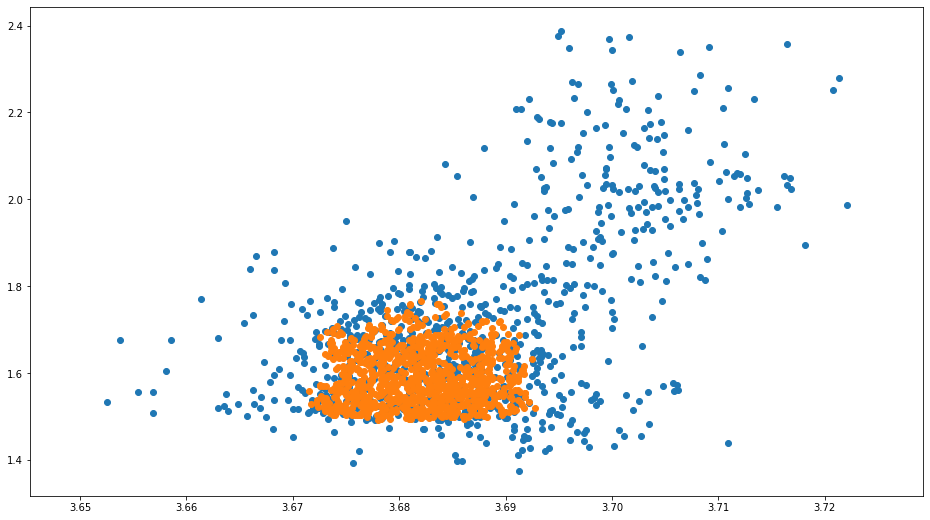

In [45]:
new = yu.sort_values('rank', ascending=False)[:1000]
old = yu.sort_values('rank', ascending=False)[1000:]
fig, ax = plt.subplots(figsize=[16,9])
ax.scatter(df_current.teff, df_current.numax)
ax.scatter(new.lg_teff, new.lg_numax)

# Add in stage 1

We have run the stage 1 stars using BlueBEAR.  We can now integrate these in having run the Inspectr.  Let's load in the data and do a few checks.

In [47]:
check = '~/Code/PBjam/Inspector/checked.csv'
new_input = pd.read_csv(check)
new_input.head()

,Unnamed: 0,ID,teff,teff_err,numax,numax_err,dnu,dnu_err,bp_rp,bp_rp_err,lg_numax,lg_teff,rank,error_flag
0,4394,5629459,4837,100,41.28,0.58,4.491,0.033,1.282663,0.05,1.615740,3.684576,6.883443,0
1,10922,9456598,4841,100,40.63,0.70,4.487,0.018,1.286463,0.05,1.608847,3.684935,6.876636,0
2,14354,11250139,4834,100,40.40,0.49,4.611,0.009,1.278662,0.05,1.606381,3.684307,6.874328,0
3,11696,9834365,4830,80,39.99,0.76,4.479,0.023,1.279106,0.05,1.601951,3.683947,6.872019,0
4,1699,3946593,4831,80,39.40,0.75,4.516,0.021,1.281460,0.05,1.595496,3.684037,6.871032,0


In [49]:
new_input.error_flag.unique()

array([ 0,  1, -1])

In [52]:
print(f'Good {len(new_input.loc[new_input.error_flag == 0])}')
print(f'Bad {len(new_input.loc[new_input.error_flag == 1])}')
print(f'Missing {len(new_input.loc[new_input.error_flag == -1])}')

Good 702
Bad 117
Missing 181


We will have to check on the msising stars.  Let's add in the good ones for now ...

In [53]:
good = new_input.loc[new_input.error_flag == 0]

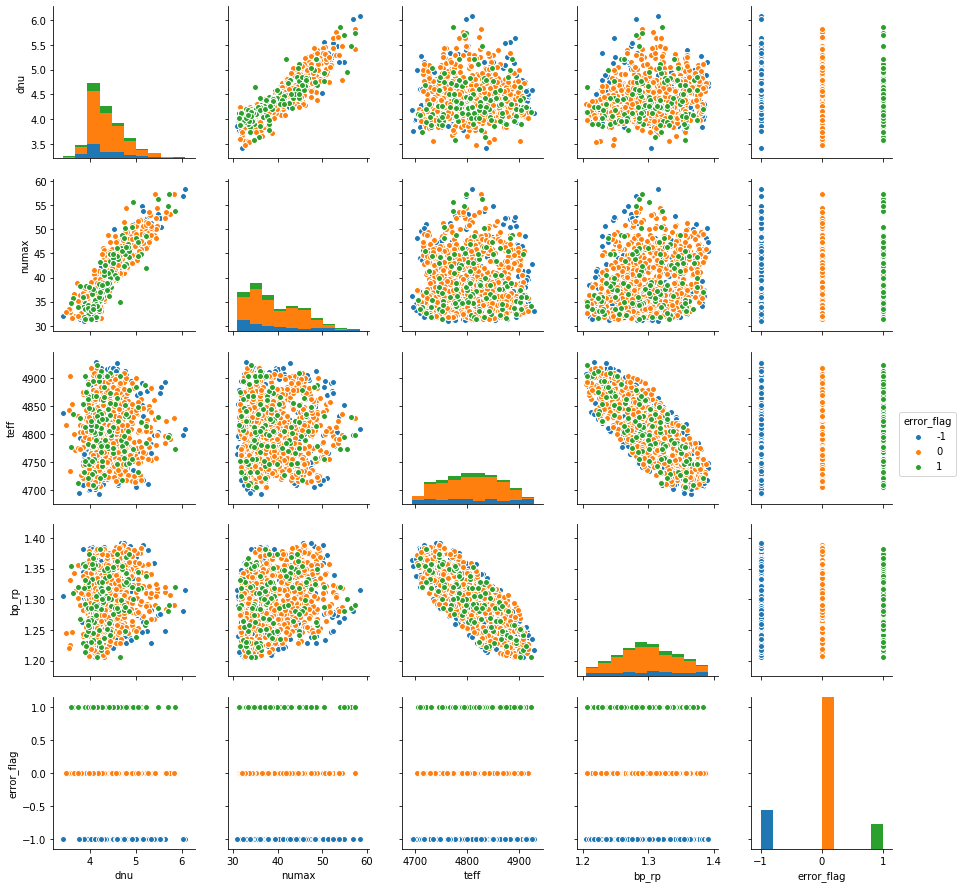

In [55]:
sns.pairplot(new_input[['dnu', 'numax', 'teff', 'bp_rp', 'error_flag']], hue='error_flag')

In [92]:
s1_prior = df_current.copy()
ddir = '/home/davies/mnt/rds/pbjam/PBjamResults/'
for idx, row in good.iterrows():
    kic = str(int(row['ID']))
    df = pd.read_csv(ddir + kic + f'/asy_summary_{kic}.csv')
    s1_prior = s1_prior.append(df.iloc[2], ignore_index=True)

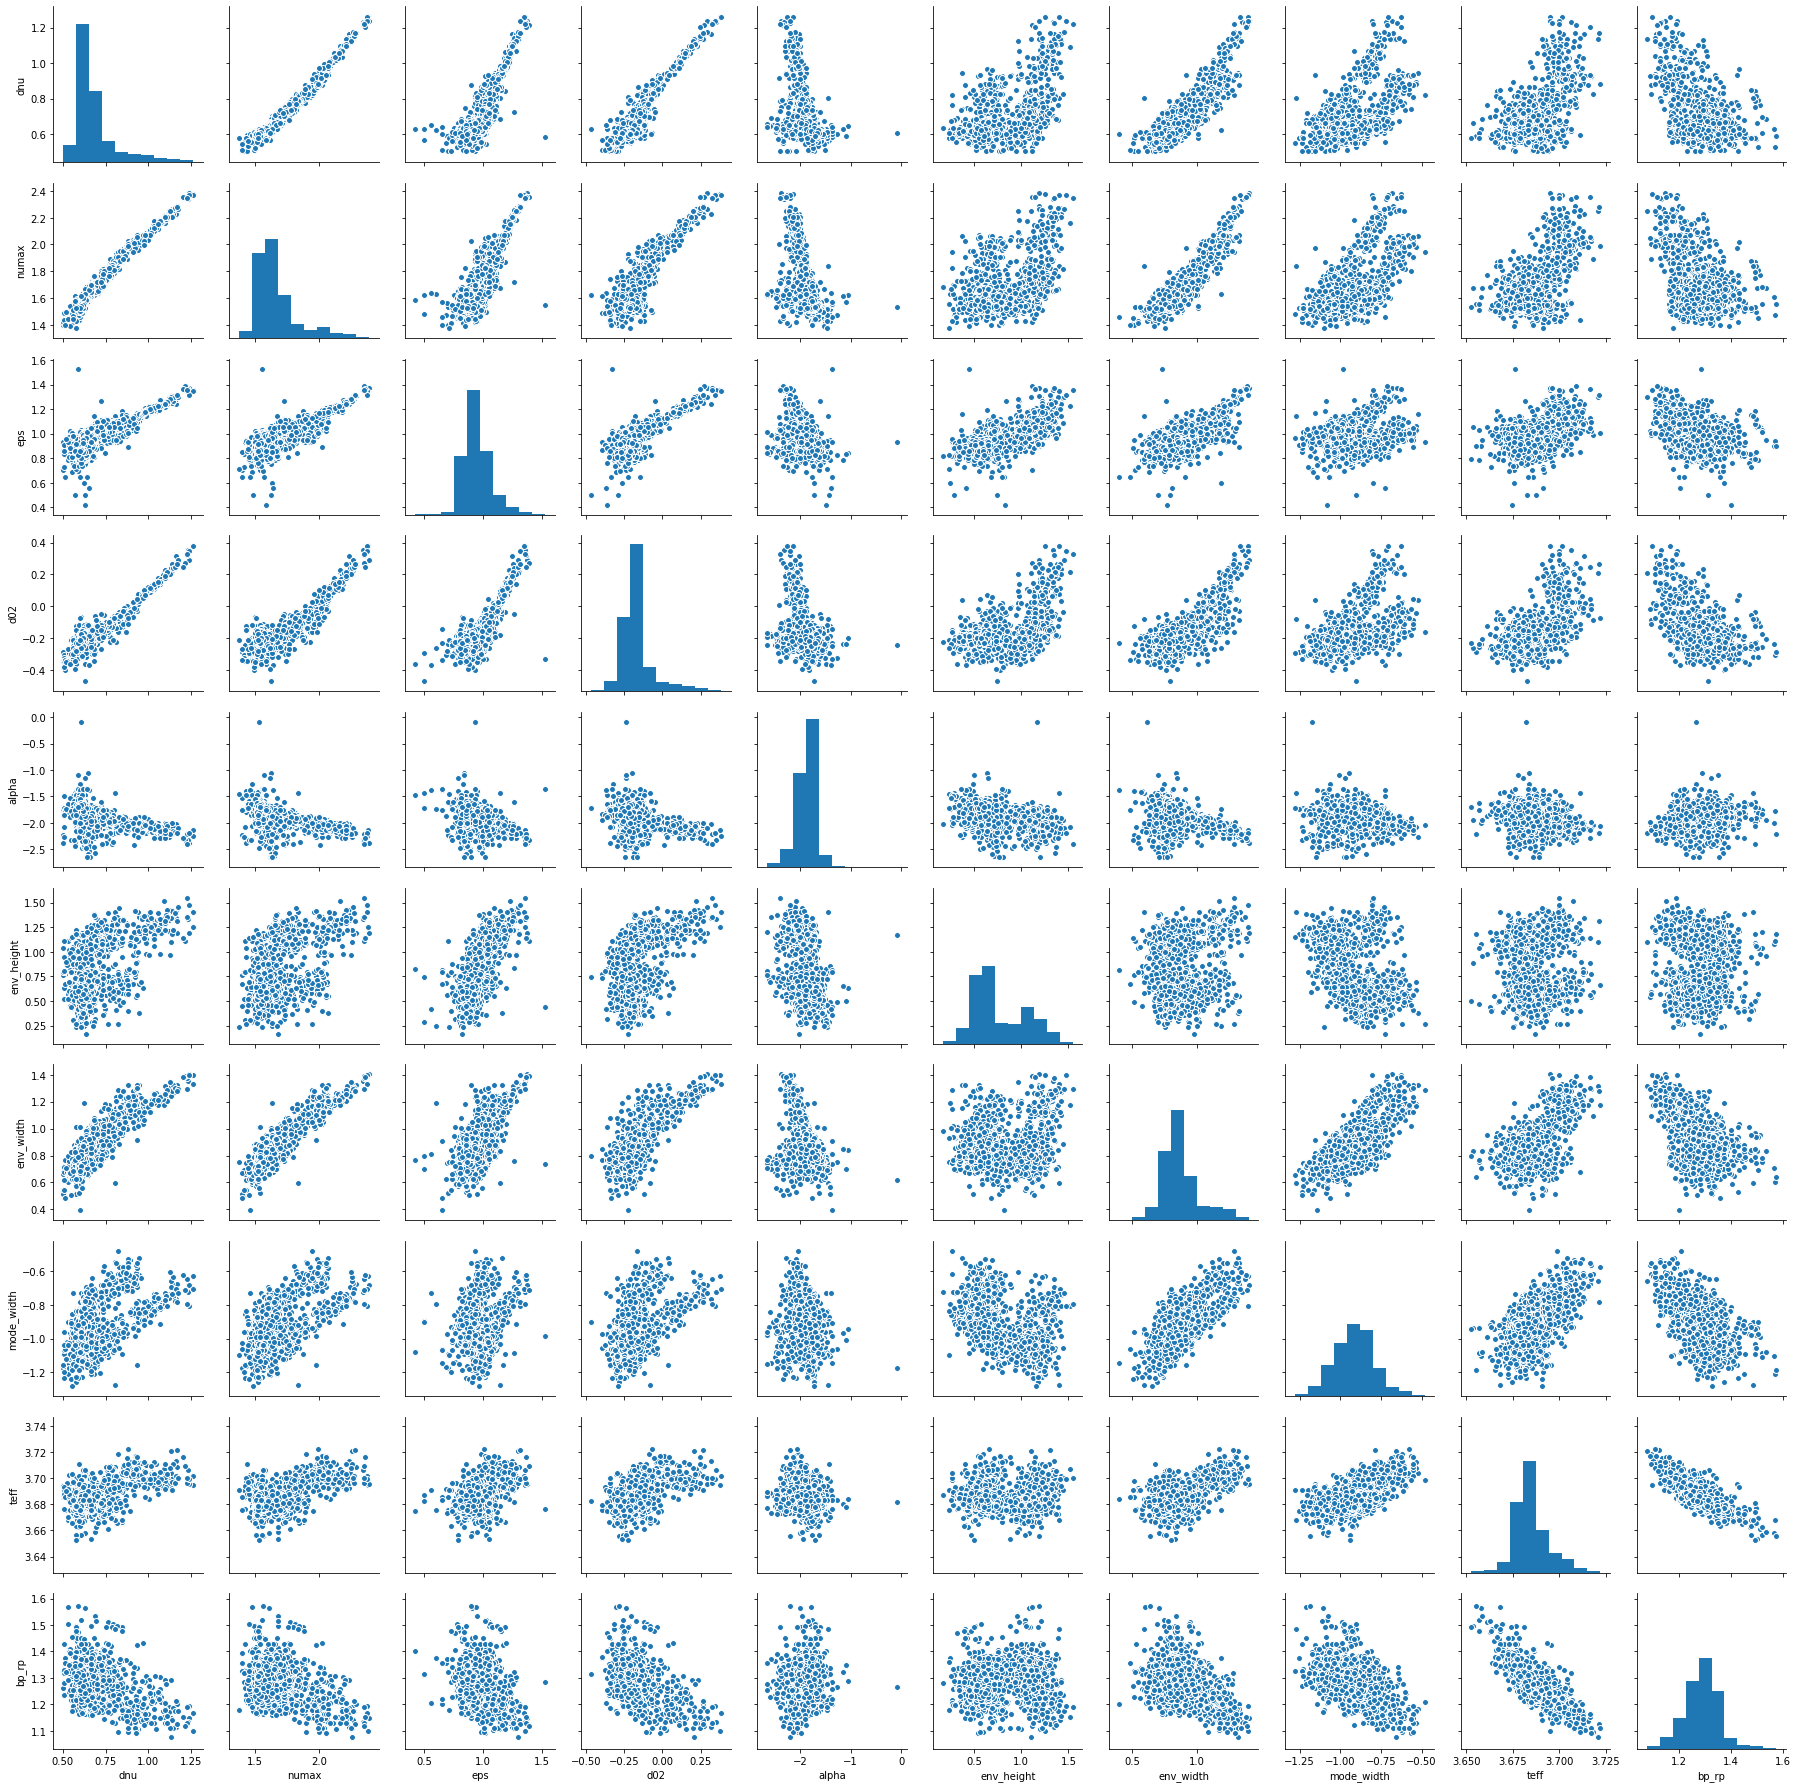

In [94]:
sns.pairplot(s1_prior)

In [101]:
s1_prior = s1_prior.loc[(s1_prior.eps > 0.65) & (s1_prior.eps < 1.45)]
s1_prior.to_csv('prior_data.csv', index=False)

In [96]:
yu.sort_values('rank', ascending=False)[800:2000].to_csv('stage2.csv')

In [102]:
len(s1_prior)

1591

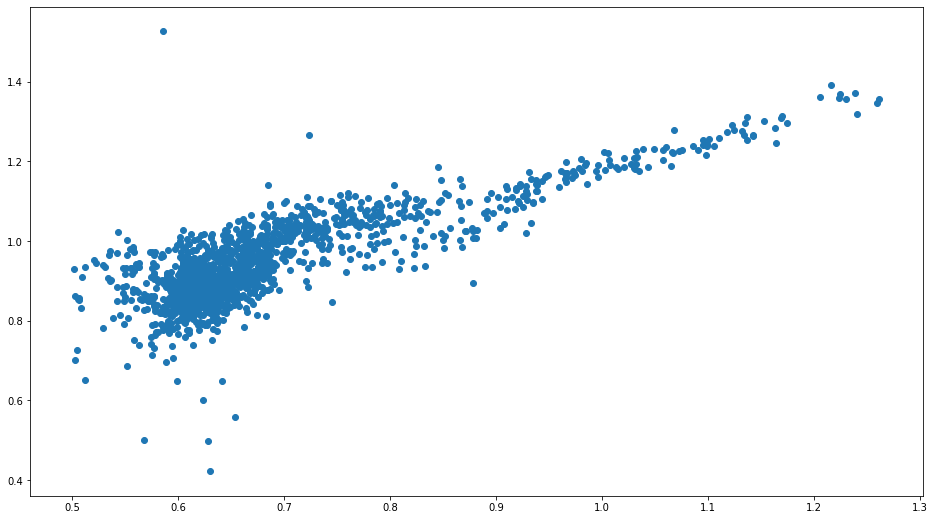

In [99]:
fig, ax = plt.subplots(figsize=[16, 9])
ax.scatter(s1_prior.dnu, s1_prior.eps)

# Add in stage 2

In [103]:
check = 'stage2_checked.csv'
new_input = pd.read_csv(check)
new_input.head()

,Unnamed: 0,ID,teff,teff_err,numax,numax_err,dnu,dnu_err,bp_rp,bp_rp_err,lg_numax,lg_teff,rank,error_flag
0,5271,6197448,4756,80,50.45,1.18,4.927,0.018,1.319923,0.05,1.702861,3.677242,6.326358,1
1,11446,9716994,4814,80,31.77,1.14,4.131,0.031,1.304801,0.05,1.502017,3.682506,6.326212,0
2,15701,12151240,4830,137,56.39,0.49,5.476,0.019,1.285007,0.05,1.751202,3.683947,6.325860,0
3,13977,11043952,4814,80,48.57,0.57,5.217,0.014,1.263016,0.05,1.686368,3.682506,6.324952,0
4,5031,6035800,4732,80,31.81,0.62,3.883,0.040,1.317852,0.05,1.502564,3.675045,6.324348,0


In [104]:
print(f'Good {len(new_input.loc[new_input.error_flag == 0])}')
print(f'Bad {len(new_input.loc[new_input.error_flag == 1])}')
print(f'Missing {len(new_input.loc[new_input.error_flag == -1])}')

Good 1005
Bad 195
Missing 0


In [118]:
good = new_input.loc[new_input.error_flag == 0]
print(len(good))

1005


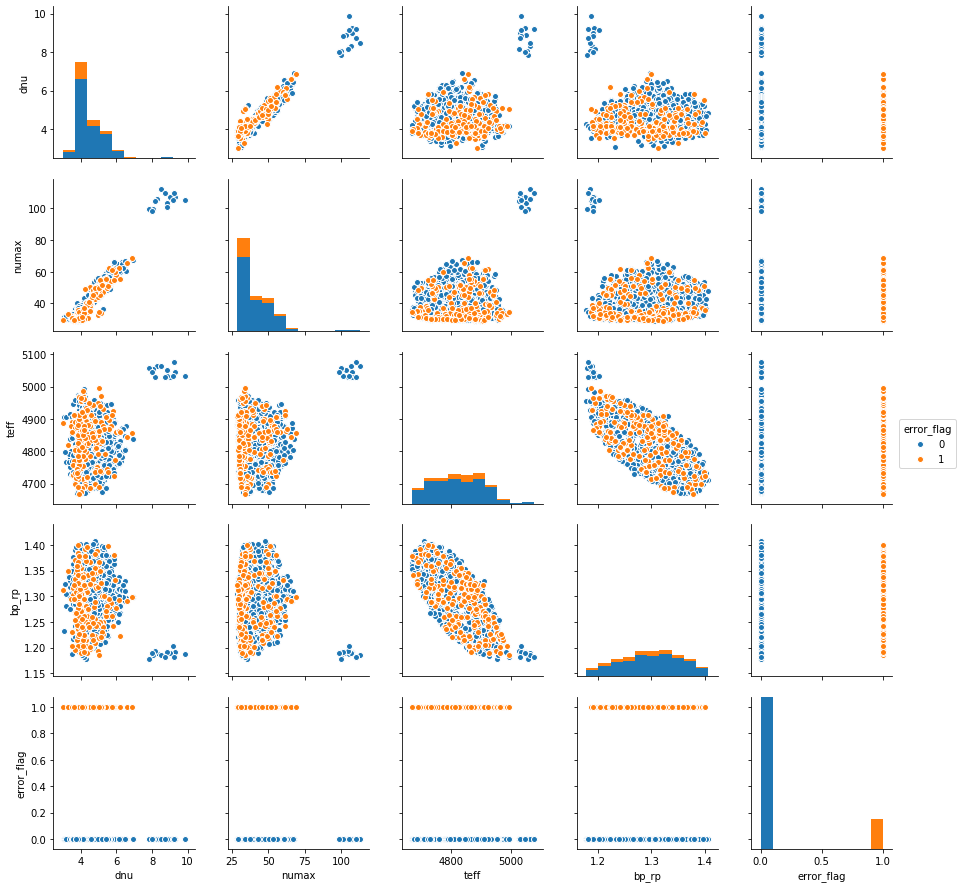

In [106]:
sns.pairplot(new_input[['dnu', 'numax', 'teff', 'bp_rp', 'error_flag']], hue='error_flag')

In [125]:
s2_prior = s1_prior.copy()
import os
ddir = '/home/davies/mnt/rds/pbjam/PBjamResults/'
for idx, row in good.iterrows():
    kic = str(int(row['ID']))
    sfile = ddir + 'KIC' + kic + f'/asy_summary_KIC{kic}.csv'
    if os.path.exists(sfile):
        df = pd.read_csv(sfile)
        s2_prior = s2_prior.append(df.iloc[2], ignore_index=True)
    else:
        print(f'Missing {sfile}')

Missing /home/davies/mnt/rds/pbjam/PBjamResults/KIC11043952/asy_summary_KIC11043952.csv
Missing /home/davies/mnt/rds/pbjam/PBjamResults/KIC6035800/asy_summary_KIC6035800.csv
Missing /home/davies/mnt/rds/pbjam/PBjamResults/KIC9291976/asy_summary_KIC9291976.csv
Missing /home/davies/mnt/rds/pbjam/PBjamResults/KIC9777885/asy_summary_KIC9777885.csv
Missing /home/davies/mnt/rds/pbjam/PBjamResults/KIC6681414/asy_summary_KIC6681414.csv
Missing /home/davies/mnt/rds/pbjam/PBjamResults/KIC8604489/asy_summary_KIC8604489.csv
Missing /home/davies/mnt/rds/pbjam/PBjamResults/KIC7281777/asy_summary_KIC7281777.csv
Missing /home/davies/mnt/rds/pbjam/PBjamResults/KIC9717040/asy_summary_KIC9717040.csv
Missing /home/davies/mnt/rds/pbjam/PBjamResults/KIC10154247/asy_summary_KIC10154247.csv
Missing /home/davies/mnt/rds/pbjam/PBjamResults/KIC10001796/asy_summary_KIC10001796.csv
Missing /home/davies/mnt/rds/pbjam/PBjamResults/KIC10809277/asy_summary_KIC10809277.csv
Missing /home/davies/mnt/rds/pbjam/PBjamResult

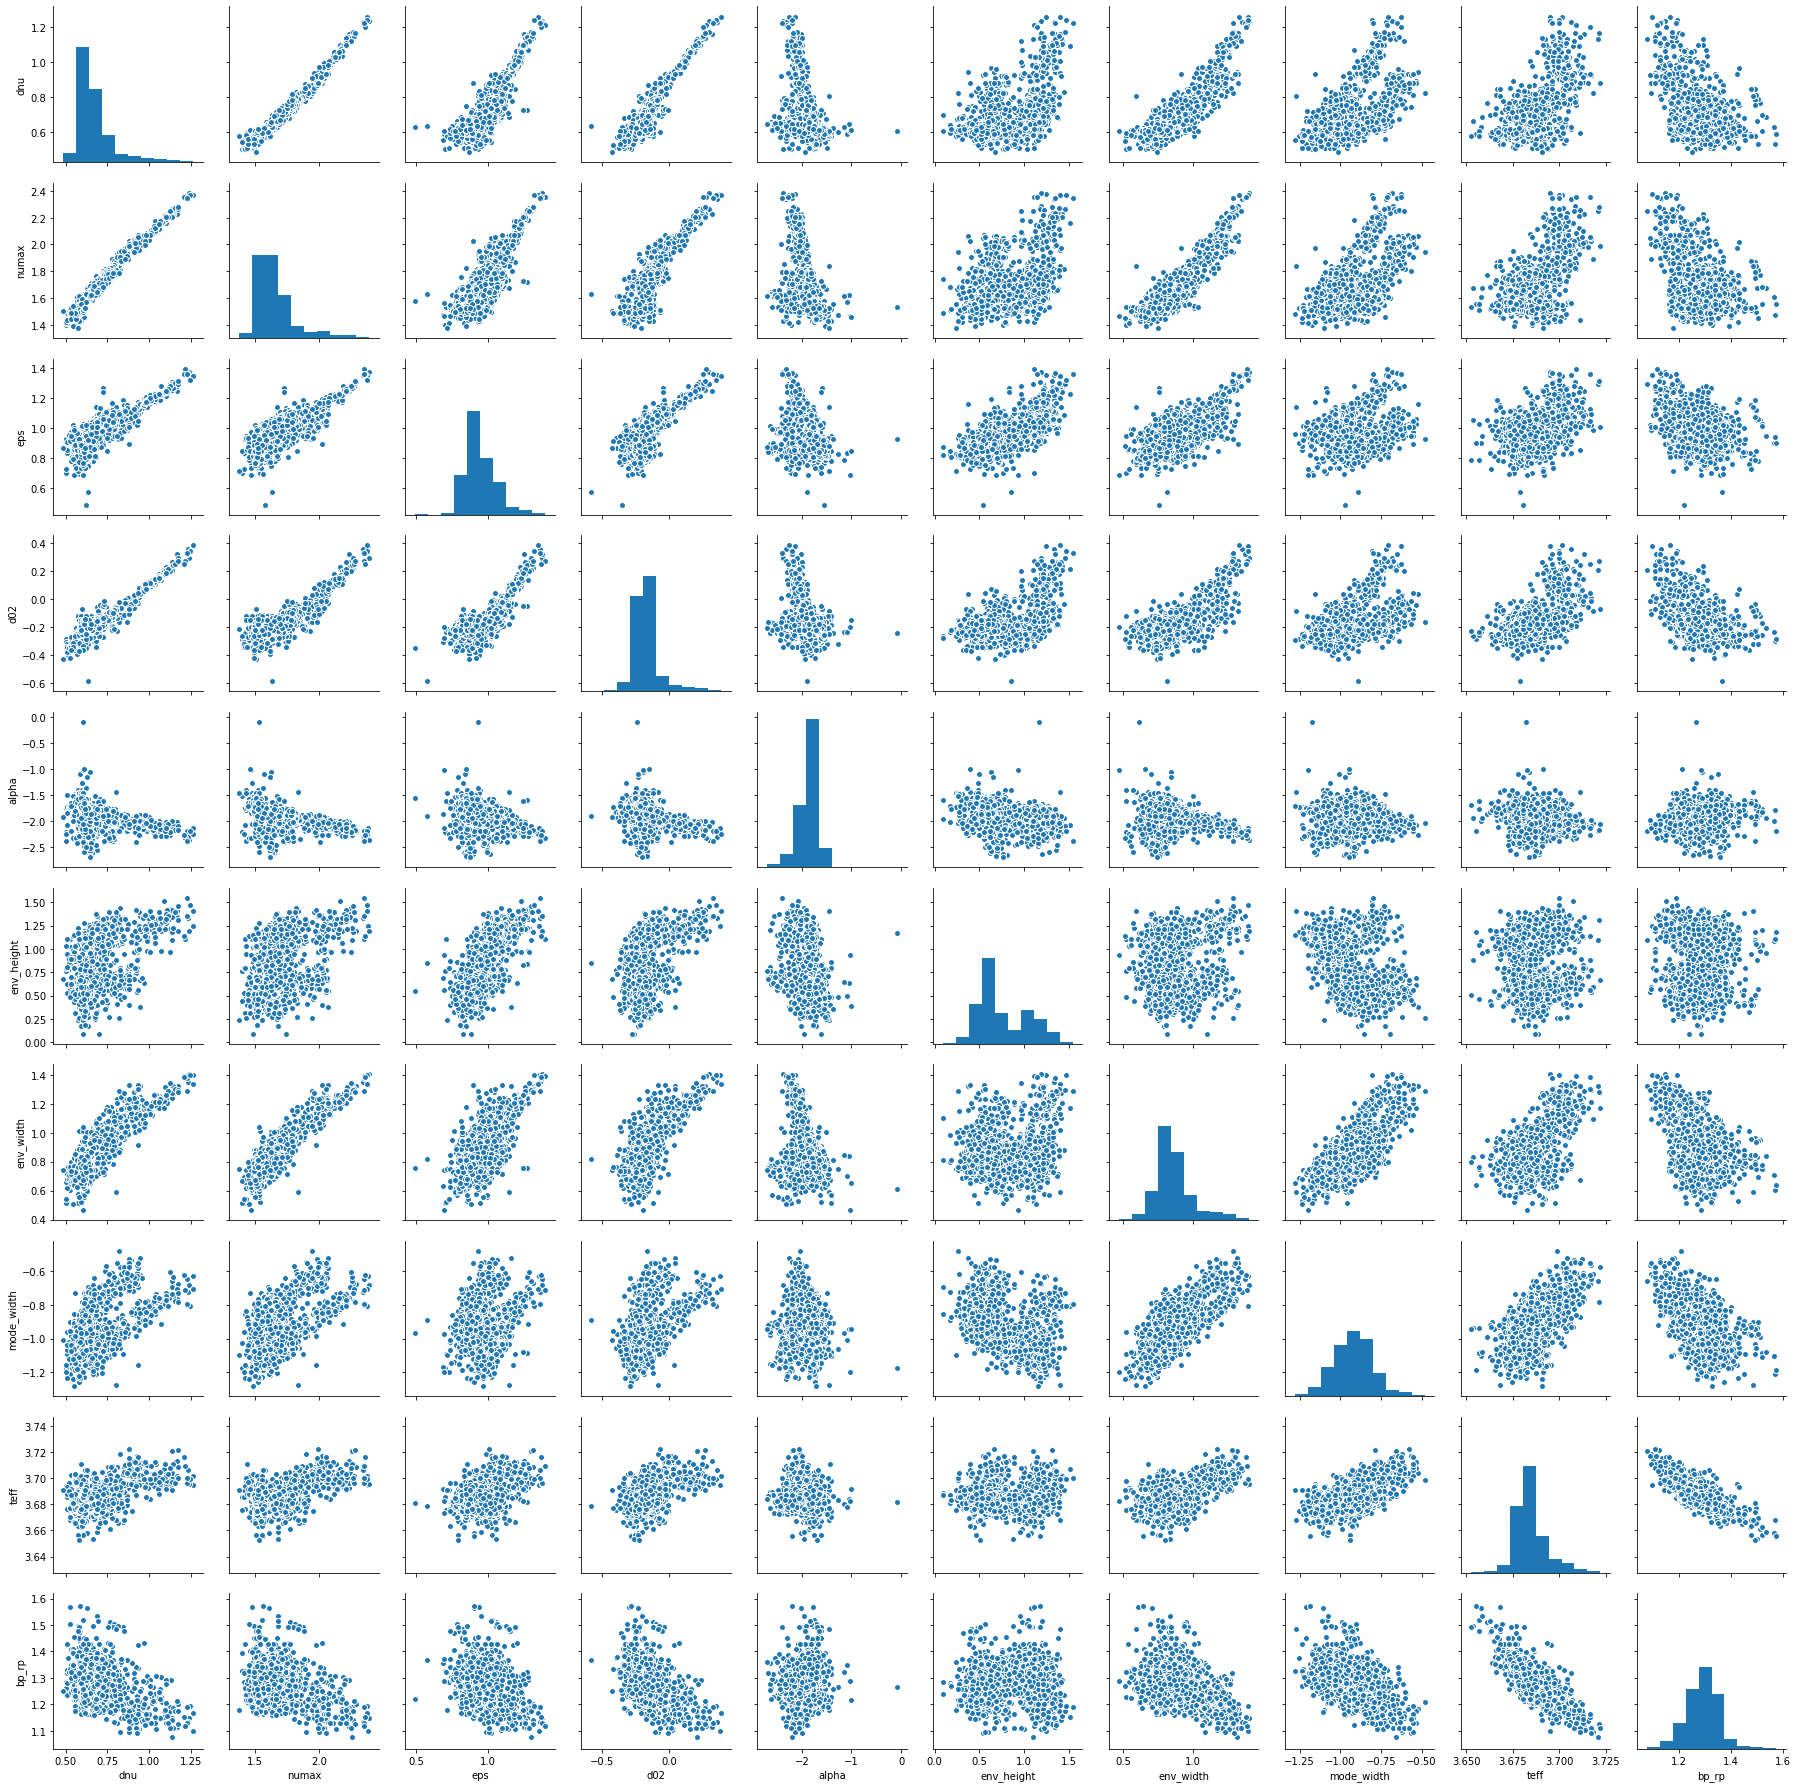

In [116]:
sns.pairplot(s2_prior)

1591
2563


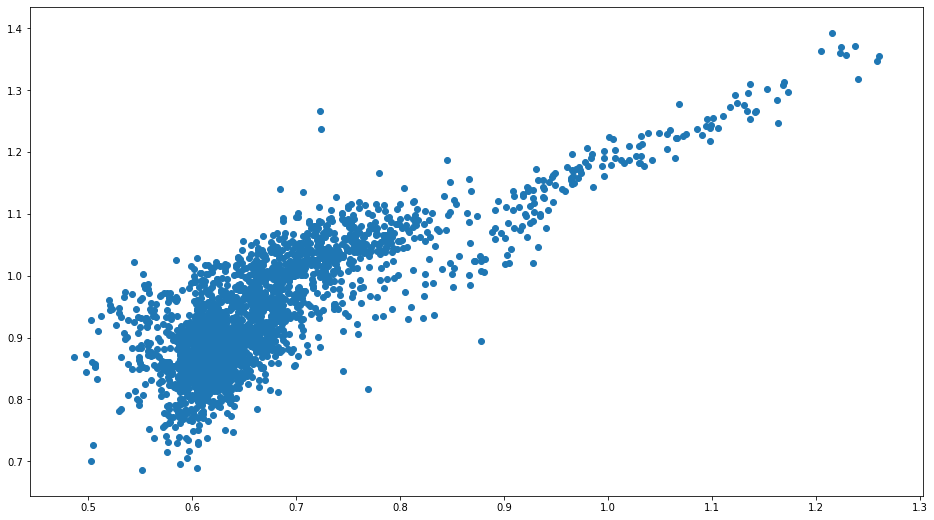

In [129]:
fig, ax = plt.subplots(figsize=[16, 9])
ax.scatter(s2_prior.dnu, s2_prior.eps)
print(len(s1_prior))
print(len(s2_prior))

In [127]:
s2_prior = s2_prior.loc[(s2_prior.eps > 0.65) & (s2_prior.eps < 1.45)]# Watch out this line might be BS in future!
s2_prior.to_csv('prior_data.csv', index=False)

In [128]:
yu.sort_values('rank', ascending=False)[2000:4000].to_csv('stage3.csv')

In [131]:
yu.sort_values('rank', ascending=False)[4000:8000].to_csv('stage4.csv')

In [132]:
yu.sort_values('rank', ascending=False)[8000:12000].to_csv('stage5.csv')

In [133]:
yu.sort_values('rank', ascending=False)[12000:16000].to_csv('stage6.csv')